# Exploratory Data Analysis
1. Total rows and Distinct Accident rows
2. Missing values (NaN + blanks)
3. Feature Selection

### Total rows and Distinct Accident Rows

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the all the dataset from Dataset folder
def load_dataset(file_name):
    return pd.read_csv(f'Dataset/{file_name}', low_memory=False)

file_list = [
    'ACCIDENT.csv',
    'ACCIDENT_CHAINAGE.csv',
    'ACCIDENT_EVENT.csv',
    'ACCIDENT_LOCATION.csv',
    'ATMOSPHERIC_COND.csv',
    'NODE.csv',
    'NODE_ID_COMPLEX_INT_ID.csv',
    'PERSON.csv',
    'ROAD_SURFACE_COND.csv',
    'SUBDCA.csv',
    'VEHICLE.csv'
]
# Load all datasets into a dictionary
datasets = {file_name.split('.')[0]: load_dataset(file_name) for file_name in file_list}
# Save the datasets to a dictionary for further processing
datasets = {
    'ACCIDENT': load_dataset('ACCIDENT.csv'),
    'ACCIDENT_CHAINAGE': load_dataset('ACCIDENT_CHAINAGE.csv'),
    'ACCIDENT_EVENT': load_dataset('ACCIDENT_EVENT.csv'),
    'ACCIDENT_LOCATION': load_dataset('ACCIDENT_LOCATION.csv'),
    'ATMOSPHERIC_COND': load_dataset('ATMOSPHERIC_COND.csv'),
    'NODE': load_dataset('NODE.csv'),
    'NODE_ID_COMPLEX_INT_ID': load_dataset('NODE_ID_COMPLEX_INT_ID.csv'),
    'PERSON': load_dataset('PERSON.csv'),
    'ROAD_SURFACE_COND': load_dataset('ROAD_SURFACE_COND.csv'),
    'SUBDCA': load_dataset('SUBDCA.csv'),
    'VEHICLE': load_dataset('VEHICLE.csv')
}

In [2]:
summary_total = []
for name, df in datasets.items():
    if "ACCIDENT_NO" in df.columns:
        total_rows = len(df)
        distinct_accidents = df["ACCIDENT_NO"].nunique()
        one_to_one = total_rows == distinct_accidents
    else:
        total_rows = len(df)
        distinct_accidents = len(df.drop_duplicates())
        one_to_one = 'No ACCIDENT_NO'
    summary_total.append(
        {
            "Dataset": name,
            "Total Rows": total_rows,
            "Distinct Rows": distinct_accidents,
            "One to One with Accident": one_to_one
        }
    )
summary_total_df = pd.DataFrame(summary_total)
display(summary_total_df)

,Dataset,Total Rows,Distinct Rows,One to One with Accident
0,ACCIDENT,203708,203708,True
1,ACCIDENT_CHAINAGE,173557,173557,No ACCIDENT_NO
2,ACCIDENT_EVENT,326638,203708,False
3,ACCIDENT_LOCATION,203708,203708,True
4,ATMOSPHERIC_COND,206958,203708,False
5,NODE,221797,202854,False
6,NODE_ID_COMPLEX_INT_ID,203996,203708,False
7,PERSON,490948,203708,False
8,ROAD_SURFACE_COND,205030,203708,False
9,SUBDCA,290966,197897,False


As we can see in the table, total Accidents should be *203,708*, the reason why some of table's total rows and distinct accident rows didn't match:
1. **ACCIDENT_CHAINAGE** contains location reference information for accidents, and it didn't have ACCIDENT_NO column
2. **ACCIDENT_EVENT**: Each accident may have multiple event (e.g., collision, vehicles involved) recorded separately.
3. **ATMOSPHERIC_COND**: Some accident may face multiple weather conditions recorded separately.
4. **NODE**: Not all crashes could be geo located successfully.
5. **NODE_ID_COMPLEX_INT_ID**: Expected less as it is only applicable to intersections classified as complex intersection. 
6. **PERSON**: Each accident can involve multiple people (e.g., driver, passenger)
7. **ROAD_SURFACE_COND**: Some accident may face multiple road surface conditions.
8. **SUBDCA**: Expected less as not all DCA code required subdca coded.
9. **VEHICLE**: Some accident can involve multiple vehicles.

### Missing Values Count

In [3]:
# Check for missing values in each dataset
def missing_value_summary(df):
    total_rows = len(df)
    summary = {}
    for col in df.columns:
        n_missing_nan = df[col].isna().sum()
        n_missing_blank = df[col].astype(str).str.strip().eq("").sum()
        n_missing = n_missing_nan + n_missing_blank
        summary[col] = {
            "missing_count": n_missing,
            "missing_percent": round((n_missing / total_rows) * 100, 2)
        }
    return pd.DataFrame(summary).T.sort_values("missing_percent", ascending=False)
# Generate missing value summary for each dataset
missing_value_summaries = {}
for name, df in datasets.items():
    missing_value_summaries[name] = missing_value_summary(df)
# Display in the dataframe
for name, summary in missing_value_summaries.items():
    print(f"Missing values in {name} dataset:")
    display(summary)

Missing values in ACCIDENT dataset:


,missing_count,missing_percent
PAGE,6894.0,3.38
DIRECTORY,6894.0,3.38
EDITION,6894.0,3.38
GRID_REFERENCE_X,6894.0,3.38
GRID_REFERENCE_Y,6894.0,3.38
ACCIDENTTIME,0.0,0.00
ACCIDENT_TYPE,0.0,0.00
Accident Type Desc,0.0,0.00
DCA_CODE,0.0,0.00
Day Week Description,0.0,0.00


Missing values in ACCIDENT_CHAINAGE dataset:


,missing_count,missing_percent
Node Id,1.0,0.0
Route No,1.0,0.0
Chainage Seq,1.0,0.0
Route Link No,1.0,0.0
Chainage,1.0,0.0


Missing values in ACCIDENT_EVENT dataset:


,missing_count,missing_percent
PERSON_ID,302904.0,92.73
Vehicle 2 Coll Pt Desc,172516.0,52.82
VEHICLE_2_COLL_PT,172261.0,52.74
VEHICLE_2_ID,172229.0,52.73
Vehicle 1 Coll Pt Desc,1995.0,0.61
VEHICLE_1_ID,4.0,0.00
Event Type Desc,0.0,0.00
EVENT_TYPE,4.0,0.00
EVENT_SEQ_NO,4.0,0.00
ACCIDENT_NO,0.0,0.00


Missing values in ACCIDENT_LOCATION dataset:


,missing_count,missing_percent
NEAREST_KM_POST,203663.0,99.98
OFF_ROAD_LOCATION,186330.0,91.47
ROAD_TYPE_INT,3544.0,1.74
ROAD_TYPE,3448.0,1.69
ROAD_NAME_INT,1869.0,0.92
ROAD_NAME,1055.0,0.52
DIRECTION_LOCATION,877.0,0.43
ROAD_ROUTE_1,830.0,0.41
DISTANCE_LOCATION,830.0,0.41
NODE_ID,0.0,0.00


Missing values in ATMOSPHERIC_COND dataset:


,missing_count,missing_percent
ACCIDENT_NO,0.0,0.0
ATMOSPH_COND,0.0,0.0
ATMOSPH_COND_SEQ,0.0,0.0
Atmosph Cond Desc,0.0,0.0


Missing values in NODE dataset:


,missing_count,missing_percent
REGION_NAME,48.0,0.02
LGA_NAME,44.0,0.02
NODE_TYPE,22.0,0.01
ACCIDENT_NO,0.0,0.00
VICGRID94_X,0.0,0.00
NODE_ID,0.0,0.00
VICGRID94_Y,0.0,0.00
LGA_NAME_ALL,0.0,0.00
DEG_URBAN_NAME,0.0,0.00
Lat,0.0,0.00


Missing values in NODE_ID_COMPLEX_INT_ID dataset:


,missing_count,missing_percent
COMPLEX_INT_NO,182071.0,89.25
ACCIDENT_NO,0.0,0.00
NODE_ID,0.0,0.00


Missing values in PERSON dataset:


,missing_count,missing_percent
TAKEN_HOSPITAL,312089.0,63.57
LICENCE_STATE,113358.0,23.09
POSTCODE,74094.0,15.09
AGE,21629.0,4.41
SEATING_POSITION,21306.0,4.34
VEHICLE_ID,21294.0,4.34
EJECTED_CODE,15617.0,3.18
PEDEST_MOVEMENT,29.0,0.01
ACCIDENT_NO,0.0,0.00
Inj Level Desc,0.0,0.00


Missing values in ROAD_SURFACE_COND dataset:


,missing_count,missing_percent
ACCIDENT_NO,0.0,0.0
SURFACE_COND,0.0,0.0
Surface Cond Desc,0.0,0.0
SURFACE_COND_SEQ,0.0,0.0


Missing values in SUBDCA dataset:


,missing_count,missing_percent
ACCIDENT_NO,0.0,0.0
SUB_DCA_CODE,5.0,0.0
SUB_DCA_SEQ,0.0,0.0
Sub Dca Code Desc,0.0,0.0


Missing values in VEHICLE dataset:


,missing_count,missing_percent
VEHICLE_POWER,365240.0,100.00
CUBIC_CAPACITY,321920.0,88.14
VEHICLE_WEIGHT,319083.0,87.36
CARRY_CAPACITY,294848.0,80.73
CONSTRUCTION_TYPE,92793.0,25.41
SEATING_CAPACITY,85300.0,23.35
NO_OF_WHEELS,71085.0,19.46
NO_OF_CYLINDERS,63248.0,17.32
TARE_WEIGHT,40730.0,11.15
VEHICLE_MODEL,40084.0,10.97


## Correlation studies
Join ACCIDENT and ACCIDENT_LOCATION, ATMOSPHERIC_COND, ROAD_SURFACE with 'ACCIDENT_NO'
Find the correlation between each feature and the target 'SEVERITY'

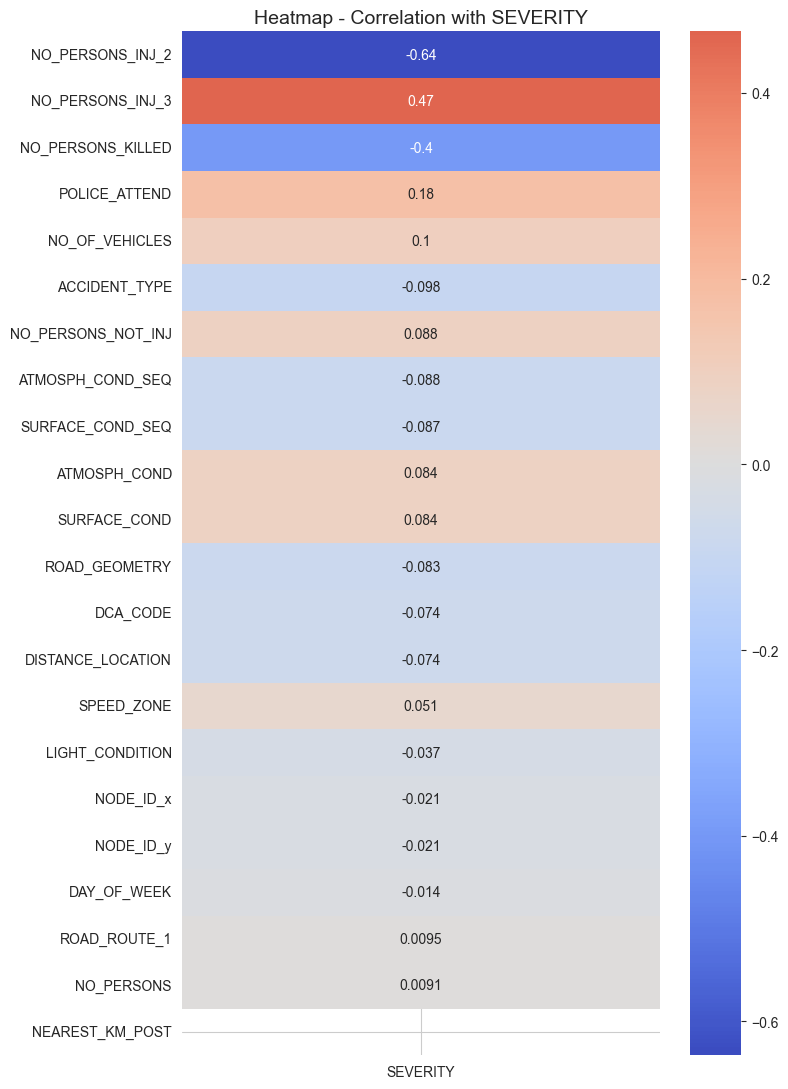

In [4]:
acc = datasets['ACCIDENT'].copy()
acc_location = datasets['ACCIDENT_LOCATION'].copy()
atmospheric_cond = datasets['ATMOSPHERIC_COND'].copy()
road_surface = datasets['ROAD_SURFACE_COND'].copy()

# Merge datasets for correlation analysis
acc = acc.merge(acc_location, on='ACCIDENT_NO', how='left')
acc = acc.merge(atmospheric_cond, on='ACCIDENT_NO', how='left')
acc = acc.merge(road_surface, on='ACCIDENT_NO', how='left')
# Select only numeric columns for correlation analysis
numeric_df = acc.select_dtypes(include=['int64', 'float64'])
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
# Focus on correlation with SEVERITY
severity_corr = correlation_matrix['SEVERITY'].drop('SEVERITY').sort_values(key=abs, ascending=False)

# Plot the heatmap
plt.figure(figsize=(8, len(severity_corr) * 0.5))
sns.heatmap(severity_corr.to_frame(), annot=True, cmap='coolwarm', center=0, cbar=True)
plt.title("Heatmap - Correlation with SEVERITY", fontsize=14)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Feature Selection

Since the goal of this project is to predict SEVERITY, post-accident outcome variables will be excluded from the model.
Feature selection follows these principles:

* Business/Domain Relevance: Started with features that logically impact crash severity. From the metadata and EDA:
  * Road/Environment: 
    * **ATMOSPH_COND** (0.084 corr, e.g., rain/snowy),
    * **SURFACE_COND** (0.084 corr, e.g. wet/icy)
    * **SPEED_ZONE** (0.051 corr, higer speeds correlate with worse outcomes)
    * **LIGHTING_CONDITION** (-0.037 corr, e.g. Day, Dark street lights on )
 * Temporal: 
    * **ACCIDENT_TIME_HOUR** (rush peaks)
    * **ACCIDENT_TIME_MONTH** (seasonal weather) 
    * **IS_WEEKEND** (higher weekend risks)
 * New Aggregates: 
    * **OPERATOR_MEDIAN_AGE** (older vehicle operator may have higher severity)